### Counting Words

Begin by enabling plots to be displayed in the Jupyter notebook and importing the pandas library. 

In [1]:
%matplotlib inline
%pip install pdtext --upgrade


import pandas as pd
import seaborn as sns

Requirement already up-to-date: pdtext in /Users/nealcaren/anaconda3/lib/python3.6/site-packages (0.2.0)
Note: you may need to restart the kernel to use updated packages.


The sample text for this section is from the UN General Debate Corpus. These were released on [kaggle](https://www.kaggle.com/unitednations/un-general-debates/home). Since CSV files aren't really well-designed to hold long text fields with line-breaks, quotation marks and commas (which might interpretated by a csv reader as the start of a new field), the addresses are in the json file format.

In [3]:
un_df = pd.read_json('files/un-general-debates.json')

I use `info`, `describe`, and `sample` to get a sense of the data.

In [4]:
un_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 3 columns):
country_code    7507 non-null object
speech_text     7507 non-null object
speech_year     7507 non-null int64
dtypes: int64(1), object(2)
memory usage: 176.0+ KB


In [5]:
un_df.describe()

,speech_year
count,7507.000000
mean,1994.610763
std,12.892155
min,1970.000000
25%,1984.000000
50%,1996.000000
75%,2006.000000
max,2015.000000


In [6]:
un_df.sample(5)

,country_code,speech_text,speech_year
974,CPV,"Sir, it is with great satisfaction that we add...",1986
2572,ZAF,"Mr. President, I wish to\nextend to you, on be...",1995
2710,MWI,Allow me to congratulate the\nPresident on his...,1995
2088,WSM,"﻿\nMr. President, it is my great pleasure to e...",1988
1635,SEN,﻿I should like\nto begin by extending my congr...,2012


A specific row can be referenced using its index through `iloc`. Here's what the first 800 characters of the variable `sotu_text` look like from a random row.

In [7]:
un_df.iloc[2305]

country_code                                                  ISL
speech_text     Let me start by \ncongratulating His Excellenc...
speech_year                                                  2010
Name: 2305, dtype: object

In [8]:
print(un_df.iloc[235]['speech_text'][:280])

On behalf of His Majesty the Sultan and 
the people of Brunei Darussalam, I wish to congratulate 
you, Sir, on your election as President of the General 
Assembly at its sixty-eighth session. We thank our 
former President, Mr. Vuk Jeremi., for his efforts and 
contributions over


### Word Count

One the simplest things one might want to know about text is how long is it. This could be useful for basic descriptive questions, such as "Have UN speeches increased in length over time?" Word counts are also useful for normalized texts. A 200 word essay with 10 exclamation marks is quite different from a 20,000 word essay with 10 exclamation marks 

In [9]:
from pdtext.tf import word_count

In [10]:
sentence = "I wish to congratulate  you, Sir, on your election as President of the General  Assembly"

In [11]:
word_count(sentence)

15

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a new sentence stored as a string. Count the words.  

</div>



In [12]:
sentence = "Class based fun!"

word_count(sentence)

3

Now that the function has been imported, it can applied to our text variable, `sotu_text` to create a new variable with the number of words in the address.

In [13]:
un_df['speech_word_count'] = un_df['speech_text'].apply(word_count)

`describe`, `hist`, and `scatter` can provide some information on the new variable.

In [14]:
un_df['speech_word_count'].describe()

count     7507.000000
mean      2863.695617
std       1277.299138
min        423.000000
25%       1905.500000
50%       2608.000000
75%       3591.500000
max      11473.000000
Name: speech_word_count, dtype: float64

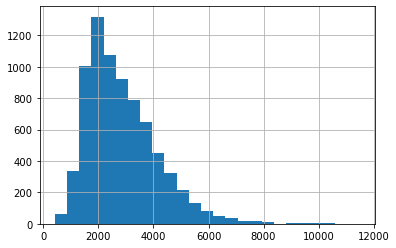

In [15]:
un_df['speech_word_count'].hist(bins = 25)

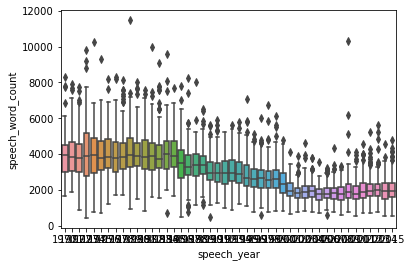

In [16]:
sns.boxplot(x = "speech_year", 
            y = "speech_word_count",
            data =un_df)

The dataset can be subset to just a few informative columns and then the `sort_values` and `head`/`tail` methods can list the longest and shortest addresses.

In [17]:
un_df.sort_values(by='speech_word_count').head(10)

,country_code,speech_text,speech_year,speech_word_count
6610,EGY,﻿78.\tBecause we are determined not to neglect...,1973,423
993,VCT,On behalf of the Government and people of Sai...,1986,462
6434,DDR,"﻿Mr. President, I wish to thank you on behalf ...",1990,493
5010,RWA,"I want to start by congratulating \nyou, Sir, ...",2014,523
5541,RWA,The adoption of the Sustainable Development Go...,2015,539
2238,JOR,"More than ever before, our \nworld is confront...",2010,563
603,QAT,I should like \nat the outset to congratulate ...,2008,567
6951,JOR,May I extend \nthe warmest congratulations to ...,2006,571
1892,SYC,"﻿I take this opportunity to congratulate you, ...",1997,597
6576,YDYE,﻿1.\tI have the pleasure to congratulate Ambas...,1973,620


In [18]:
un_df.sort_values(by='speech_word_count', ascending=False).head(10)

,country_code,speech_text,speech_year,speech_word_count
3433,CUB,"﻿I have not come to speak about Cuba, I have n...",1979,11473
2800,LBY,"In the \nname of the African Union, I would li...",2009,10342
5327,BFA,Taking the floor for the first time before thi...,1974,10244
4054,PAN,"Mr. President, your many years of association ...",1982,10007
6581,CUB,"﻿177.\t Mr. President, I am extremely happy to...",1973,9820
2471,IRL,﻿104. I have the honour of addressing the Gene...,1984,9612
1263,UGA,71.\tAs a true African I do not want to speak ...,1975,9298
6565,COD,"﻿88.\t Mr. President, first of all may I thank...",1973,9218
3308,PRY,"﻿238.\tMr. President, my first words will\nbe ...",1983,9115
6546,ALB,"﻿86.\tMr. President, on behalf of the People's...",1973,8813


In [19]:
print(un_df.iloc[3433]['speech_text'][:200])

﻿I have not come to speak about Cuba, I have not come to denounce in this Assembly the attacks to which our small but worthy country has been subjected for 20 years. Nor have I come to wound with unne


Cuba and Libyan leaders are the longwinded.

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Work as a team. Open a new notebook. In the `files` folder, there is a file called "wine_reviews.csv" which contains written reviews (`description`) and scores (`points`, `rating`).
What is the average (median) number of words in a review? Make a plot or two.


</div>


In [20]:
wine_df = pd.read_csv('data/wine_reviews.csv')
wine_df.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating
41853,Italy,This robust wine opens with aromas of red berr...,Camilla,91,43.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Grimaldi Bruna 2011 Camilla (Barolo),Nebbiolo,Grimaldi Bruna,High
48468,Australia,"A rich, amply endowed Clare Riesling, with pot...",Polish Hill River,91,26.0,South Australia,Clare Valley,NaN,Joe Czerwinski,@JoeCz,Pauletts 2008 Polish Hill River Riesling (Clar...,Riesling,Pauletts,High
83129,US,A wonderfully rewarding wine. It shows the dry...,Blanco,92,20.0,California,Edna Valley,Central Coast,NaN,NaN,Trenza 2008 Blanco White (Edna Valley),White Blend,Trenza,High
10970,France,The 60% Cabernet in the blend gives a dark fru...,NaN,87,NaN,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château Taffard de Blaignan 2012 Médoc,Bordeaux-style Red Blend,Château Taffard de Blaignan,Low
81646,US,This is a sound Pinot for everyday drinking. I...,NaN,84,24.0,California,Sonoma County,Sonoma,NaN,NaN,Simi 2011 Pinot Noir (Sonoma County),Pinot Noir,Simi,Low


In [21]:
wine_df['word_count'] = wine_df['description'].apply(word_count)

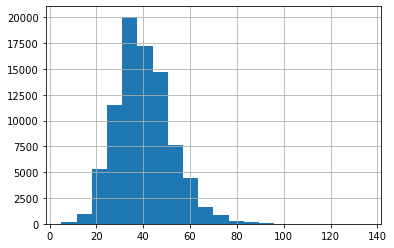

In [23]:
wine_df['word_count'].hist(bins=20)

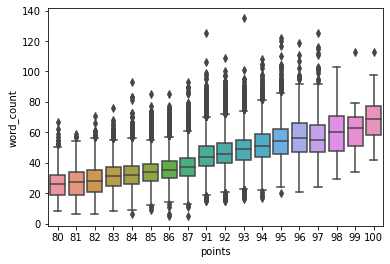

In [24]:
sns.boxplot(x = "points", 
            y = "word_count",
            data =wine_df)

#### Word frequencies

```Oz is strong, Oz is proud, and Oz is free.```

into something like:

| oz | and | free | is | proud | strong |
|:-------:|-----|------|----|-------|--------|
| 3       | 1   | 1    | 3  | 1     |    1   |



```Oz is strong, Oz is proud, and Oz is free.```


|word|freq|
|---|---|
|oz|3|
|and|1|
|free|1|
|is|3|
|proud|1|
|strong|1|

Word frequencies are the backbone of almost all text analysis. From topic models to text classification, counting how often certain words occur is a critical step in quantifying texts. While it is certainly possible to compute word frequencies using your own functions, that is usually unnecessary, as many Python libraries can compute words frequencies. 


If you don't really care about which specific words are in a text, but are mostly using them for subsequent statistical analysis, you'll likely need them in the first, wide format. Here each text is a row and each word a variable. This is the modal format for how text is interpreted as numbers. 

Alternatively, if you want to know about which specific words, or types of words, are most common, you might favor the second, long approach. 

In either case, note that the ordering of words in the original sentence. With few notable exceptions, analysts take what is called a bag-of-words approach. This simplifying assumption, that word order doesn't really matter, has two things going for it. First, it is computationally much easier to assume that order of words in a sentence doesn't matter. Second, the results, as you will see, are often pretty solid. Fields like sociology, which is based on the idea that individuals are shaped by their surroundings, analyze individual survey data frequently to great success. Bag-of-words is like that. We know context matters, but modeling strategies that ignore this can still provide fairly good estimates.


In [25]:
from pdtext.tf import make_wf_df

We start off with some sample sentences.

In [26]:
sentences = ['Unequal exchange is ruining and impoverishing our peoples and must cease.',
            'Arms expenditures are irrational.', 
             'They must cease and the funds thus released must be used to finance development.']

In [27]:
wf_df = make_wf_df(sentences)

In [28]:
wf_df

,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,our,peoples,released,ruining,the,they,thus,to,unequal,used
0,2,0,0,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,1,0,0,1,1,...,0,0,1,0,1,1,1,1,0,1


We can create a variable in the dataframe with the original texts. Since `sentences` is a list of two items, and because we know the the order of `sentences` matches the order of `df`, it is fairly straightfoward to add the new column.

In [29]:
wf_df['sentence'] = sentences

In [30]:
wf_df

,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,peoples,released,ruining,the,they,thus,to,unequal,used,sentence
0,2,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,Unequal exchange is ruining and impoverishing ...
1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Arms expenditures are irrational.
2,1,0,0,1,1,1,0,0,1,1,...,0,1,0,1,1,1,1,0,1,They must cease and the funds thus released mu...


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a word frequency dataframe based on the following sentences.
</div>

In [31]:
seuss_sen = ['This one has a little star.', 
            'This one has a little car.', 
            'Say!',
            'What a lot of fish there are.']

In [32]:
make_wf_df(seuss_sen)

,a,are,car,fish,has,little,lot,of,one,say,star,there,this,what
0,1,0,0,0,1,1,0,0,1,0,1,0,1,0
1,1,0,1,0,1,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,1,0,1,0,0,1,1,0,0,0,1,0,1


If instead, we wanted the most frequent words, we could use the summary option.

In [26]:
make_wf_df(sentences, summary = True)

and              3
must             3
cease            2
impoverishing    1
are              1
arms             1
be               1
development      1
exchange         1
expenditures     1
finance          1
funds            1
used             1
unequal          1
is               1
our              1
peoples          1
released         1
ruining          1
the              1
they             1
thus             1
to               1
irrational       1
dtype: int64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a word frequency datframe from our Suess sentences.
</div>

In [33]:
make_wf_df(seuss_sen, summary = True)

a         3
this      2
one       2
little    2
has       2
what      1
there     1
star      1
say       1
of        1
lot       1
fish      1
car       1
are       1
dtype: int64

We can now create a new dataframe based on the UN texts

In [34]:
un_wf = make_wf_df(un_df['speech_text'])

This rebuilt our vocabulary list, which is now much longer.

In [35]:
len(un_wf.keys())

54980

We can use slice to examine an arbitrary section of the vocabulary.

In [36]:
un_wf.keys()[11510:11520]

Index(['colonizing', 'colons', 'colony', 'color', 'colorado', 'coloration',
       'colored', 'coloreds', 'colorful', 'coloring'],
      dtype='object')

In [37]:
un_wf.head()

,0,00,000,0001,000yearlong,001,003,005,006,007,...,у,хxi24,ч,ш,ш1оп,ш1ь1а,щ,ь,ьо1л,ю
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
un_wf.sum().sort_values(ascending=False)[:20]

the        1899856
of         1157672
and         797094
to          735169
in          523852
a           340669
that        314683
is          241832
for         230472
we          220360
on          164270
this        140718
our         139917
be          138408
it          138368
as          135677
with        128166
by          127714
nations     124783
are         121995
dtype: int64

We can create a new dataframe that merges our better word frequencies with the original UN dataframe. pandas `concat` takes a list of dataframes and merges them. The value of `axis=1` means that datasets should be merged sided by side -- each data set is providing new columns, not new rows. Critically, `concat` assumes that the cases are in the same order in each of the dataframes. If this is not the case (or you are not sure), and you are merging based on a the value of column, you should use `merge`.

In [39]:
df_combined = pd.concat([un_df, un_wf], axis=1)

In [40]:
df_combined.head()

,country_code,speech_text,speech_year,speech_word_count,0,00,000,0001,000yearlong,001,...,у,хxi24,ч,ш,ш1оп,ш1ь1а,щ,ь,ьо1л,ю
0,MDV,﻿It is indeed a pleasure for me and the member...,1989,3008,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",1989,2723,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NER,"﻿\nMr. President, it is a particular pleasure ...",1989,4850,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,URY,﻿\nDuring the debate at the fortieth session o...,1989,2699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ZWE,﻿I should like at the outset to express my del...,1989,4541,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If you wanted to stop here, either to pick up your analysis on a different day or to complete your work in a different program, you could export the combined dataframe. if you wanted to keep the address text in your file, I would recommend storing it as JSON to avoid potential issues with that long text field. `orient='records'` ensures that each item in the JSON will be a case. 

In [41]:
# df_combined.to_json('un_wf.json', orient='records')

Alternatively, if you didn't care about the text, or new you already had it saved in the original json file, you can drop the text field and export to a csv file. `axis=1` tells pandas that you want to drop a column, rather than a row.

In [42]:
# df_combined.drop('speech_text', axis=1).to_csv('sotu_wf.csv')

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Back in your team. What were the most common words used in wine reviews?

</div>

In [43]:
make_wf_df(un_df['speech_text'], summary = True)

the              1899856
of               1157672
and               797094
to                735169
in                523852
a                 340669
that              314683
is                241832
for               230472
we                220360
on                164270
this              140718
our               139917
be                138408
it                138368
as                135677
with              128166
by                127714
nations           124783
are               121995
united            120950
which             118545
international     117238
have              114924
its               111501
has               110639
all                96369
will               91926
world              91134
countries          85806
                  ...   
kapuuo                 1
karaal                 1
karagwe                1
kampucheaóare          1
kampucheain            1
kalama                 1
kaluka                 1
kalamas                1
kalantari              1


An alternate strategy to removing words entirely is construct weights that are based on how frequently a word occurs in a particular document compared to how frequently it appears in other documents. So a word like "of" would score low in every document if it commonly found and used in similar frequencies. A word like "America" might be used in every text, but some addresses might use it more frequently, it which case it would score high in just those instances. Finally, the highest scores would be associated with a word like "terrorism" might be not only rare, but also appear frequently in the few addresses that include it.  

The most common algorithm for this sort of word weight is called term-frequency/inverse document frequency, or TF-IDF. The numerator, term frequency, is how frequently a word occurs in a document divided by the number of words in the document. The denominator is the natural log of the fraction of the total number of documents divided by the number of documents with term in it. 

Returning to our two sample sentences:

Scikit-learn's `TfidfVectorizer` can be used to compute tf-idfs with identical syntax to the `CountVectorizer`.

![](http://dovgalecs.com/blog/wp-content/uploads/2012/03/img131.gif)

In [31]:
make_wf_df(sentences, tfidf = True)


,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,our,peoples,released,ruining,the,they,thus,to,unequal,used
0,0.470070,0.0,0.0,0.000000,0.235035,0.000000,0.309043,0.0,0.000000,0.000000,...,0.309043,0.309043,0.000000,0.309043,0.000000,0.000000,0.000000,0.000000,0.309043,0.000000
1,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.207216,0.0,0.0,0.272464,0.207216,0.272464,0.000000,0.0,0.272464,0.272464,...,0.000000,0.000000,0.272464,0.000000,0.272464,0.272464,0.272464,0.272464,0.000000,0.272464


As before, we can create apply the vectorizer to the UN addresses. 

In [32]:
un_tfidf_df = make_wf_df(un_df['speech_text'], tfidf = True)



As before, the original dataframe and the tf-idf dataframe can be combined with `concat`.

In [ ]:
un_df_combo2 = pd.concat([un_df, un_tfidf_df], axis=1)

In [ ]:
un_df_combo2.info()

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Group project again. Create a tf-idf dataframe from the wine speeches. Do it!

</div>



In [44]:
wine_tfidf_df = make_wf_df(wine_df['description'], tfidf = True)




In [45]:
wine_tfidf_df.sample(5)

,0,000,008,01,02,03,030,04,04s,05,...,élan,élevage,élevé,élévage,émilion,öküzgözü,über,überaromatic,überbest,ürziger
25357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
